# The Effects of Light Levels on Sexual Compeition in Kelps

# Introduction

Kelp forests are some of the most biodiverse habitats in the world. This is because kelp are foundation species, meaning that they alter the structure of their habitat to support other organisms such as fish, invertebrates, and marine mammals  (Mann 1973; Dayton 1985; Graham 2004; Smale et al. 2013, Lind & Konar 2017). Kelp species vary greatly in their morphological and physiological traits and therefore occupy different niches, as well as support unique species assemblages (Dayton 1985, Hamilton & Konar 2007; Graham et al. 2007; Torres-Moye 2013;  Traiger & Konar 2017). Because of this, changes to the competitive dynamics of kelps within a kelp bed could alter the composition and biodiversity of the ecosystem (Dayton 1985, Graham et al. 2007, Traiger & Konar 2017, Zacher 2019). 
Much of kelp species competition occurs during their reproductive phase (Reed 1990, Graham et al. 2007, Howard 2014, Chrstiansen 2018, Zacher 2019). Kelps reproduce sexually, meaning that they produce both sperm and eggs. When the eggs are fully mature, they produce a pheromone that both stimulates sperm release and its attraction to the egg. All kelp species release the same pheromone: Lamoxierene. The species whose egg matures first is the first to release the pheromone, and therefore will trigger sperm release from all reproductive kelps in the area, even though their eggs may not be fully developed. This can decrease or inhibit reproduction in the other species, as they will no longer have sperm to fertilize their eggs when they mature(Reed 1990, Howard 2014, Christiansen 2018). The timing of egg maturation in kelp is dependent on abiotic factors (Reed 1990, Graham et al. 2007, Howard 2014, Christiansen 2018, Zacher 2019). In the kelp forest light is highly variable, and has been shown to affect the reproductive phase of kelp species(Reed & Foster 1984, Gerard 1984, Foster & Schiel 1985, Dayton et al.1999, Veenhof et al. 2021). Therefore, I am studying the effects of varying light levels on sexual competition between three kelp species in the Monterey Bay. 

# Methods

### Collection

Reproductive tissue from ~10 mature individuals will be collected monthly from Stillwater Cove (36°33'55.30''N, 121°56'36.05''W). Egregia and Macrocystis will be collected from April-December as they reproduce all year, while Pterygophora will only be collected during its reproductive period (October-December)(Abbot &Hollenberg 1976, Reed 1990, Christiansen 2018). Reproductive tissue from each species will be kept separate and transported back to the lab in a cooler. 

### Spore Release and Settlement

In order to control diatom growth, sporophylls will be submerged in 1% iodine solution for 30 seconds, DI water for 10 seconds, and then sterile seawater (27.2 g/L prepared with Instant Ocean®) for 1 minute. Sporophylls will then be layered with damp paper towels in a large dish and left in the dark at 10 ºC for a minimum of 3 hours. The sporophylls will then be removed from the dish and soaked in a saltwater bath for 1 hour to stimulate spore release (Reed et al. 1991, Howard 2014, Christiansen 2018). The resulting spore solution will be filtered through a 10 um mesh filter to separate spores. To estimate concentration, one drop of spore solution will be pipetted into a hemocytometer slide and counted at 400x magnification with a compound microscope(Reed et al. 1991, Howard 2014). The number of spores from 10 separate grids will be counted and averaged to determine the concentration of the spore solution. Spore solutions for each species will then be diluted so that 20 spores/mm2 can be added to monocultures, and 10/10 spores/mm2 can be added to polycultures (Reed 1990, Reed et al. 1991, Christiansen 2018). In order to tell the species apart, the first species will be settled 1 day before the second. After spore release, the first species will be settled into well 1(monoculture) and well 3 (polyculture) for 24 hours. The polyculture will then be examined at 400x under a Leica inverted microscope, and 5 fields of view will be photographed in order to differentiate between species. These spores will then be rinsed with artificial seawater to remove any remaining unattached spores. The second species will be settled for 24 hours in well 2 (monoculture) and with the first species in well 3.

After settlement, the same 5 fields of view in the polyculture will be photographed again.  To account for the difference in settlement period, the order in which species are settled will be switched between experiments. All experiments will be conducted in a Percival® AL-30 incubator to ensure that temperature and light intensity are controlled. 

### Treatments and Data Collection

After pouring off the water and filling the petri dishes with Provasoli enriched seawater (PES), settlement density will be calculated for all samples by counting the number of spores visible in 5 random fields of view at 400x magnification under a Leica inverted microscope (West & McBride 1999; Traiger & Konar 2017). Once settlement density is determined, dishes will be separated into four light treatments: low (5 µM photons m-2s-1), medium (20 μE·m−2·s−1), high (40 μE·m−2·s−1), and very high (60 µM photons m-2s-1). Light treatments were chosen based on the lowest quantum does at which gametogenesis occurs in 50% of female gametophytes (5 μE·m−2·s−1),), and the saturating irradiance for fertilization (40 µM photons m-2s-1) (Deysher & Dean 1984). The differing light treatments will be achieved using neutral density light filters placed on the lids of the petri dishes (Graham 1996). All treatments will be replicated 3 times per trial for each monoculture and polyculture, for a total of 12 replicates per trial.  
Each day after all spores are settled, 5 haphazardly selected ocular fields of view from each sample will be examined to determine the timing of egg production and the  number of sporophytes per egg produced under each condition in the monocultures. In addition, the five previously selected fields of view in each polyculture will be examined and photographed daily. From this point on PES will be changed weekly to ensure there are enough nutrients for growth. This will continue for ~ 2 weeks, or until sporophytes have been produced. 


# Results

### Settlement Density

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import seaborn as sns
import scipy as syp
import pingouin as pg
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
#import data
settlement_density = pd.read_excel(r'MS263_FinalProject_Data_SettlementDensity.xlsx') #import settlement density dataset
print (settlement_density)

     Dish Culture_Type  Macro_Spores  Egregia_Spores
0       1         Mono            31              53
1       1         Mono            32              37
2       1         Mono            22              44
3       1         Mono            35              45
4       1         Mono            63              32
..    ...          ...           ...             ...
353    12         Poly            22              19
354    12         Poly            24               9
355    12         Poly            24              23
356    12         Poly            28              13
357    12         Poly            15              17

[358 rows x 4 columns]


In [3]:
#melt colums Macro_Spores and Egregia_Spores together in to a "Species" column

settlement_density_melt = settlement_density.melt(
                                id_vars=["Dish","Culture_Type"],
                                value_vars=["Macro_Spores",  "Egregia_Spores"],
                                var_name="Species",
                                value_name="Settlement_Density")
print(settlement_density_melt)

     Dish Culture_Type         Species  Settlement_Density
0       1         Mono    Macro_Spores                  31
1       1         Mono    Macro_Spores                  32
2       1         Mono    Macro_Spores                  22
3       1         Mono    Macro_Spores                  35
4       1         Mono    Macro_Spores                  63
..    ...          ...             ...                 ...
711    12         Poly  Egregia_Spores                  19
712    12         Poly  Egregia_Spores                   9
713    12         Poly  Egregia_Spores                  23
714    12         Poly  Egregia_Spores                  13
715    12         Poly  Egregia_Spores                  17

[716 rows x 4 columns]


In [4]:
#Subset the data for tests of normality
M_SD = settlement_density_melt[settlement_density_melt["Species"].isin(['Macro_Spores'])] #Subset so that data shows Macrocystis spores only
M_Mono_SD= M_SD[M_SD["Culture_Type"].isin(['Mono'])] #Subset so the data only shows Macrocystis Monocultures
M_Poly_SD= M_SD[M_SD["Culture_Type"].isin(['Poly'])] #Subset so the data only shows Macrocystis Polycultures

In [5]:
E_SD = settlement_density_melt[settlement_density_melt["Species"].isin(['Egregia_Spores'])] #Subset so that data shows Egregia spores only
E_Mono_SD= E_SD[E_SD["Culture_Type"].isin(['Mono'])] #Subset so the data only shows Egregia Monocultures
E_Poly_SD= E_SD[E_SD["Culture_Type"].isin(['Poly'])] #Subset so the data only shows Egregia Polycultures

In [7]:

#take the means of each subset created

M_Mono_SDMean = M_Mono_SD["Settlement_Density"].mean()
print(M_Mono_SDMean)
M_Poly_SDMean = M_Poly_SD["Settlement_Density"].mean()
print(M_Poly_SDMean)
E_Mono_SDMean = E_Mono_SD["Settlement_Density"].mean()
print(E_Mono_SDMean)
E_Poly_SDMean = E_Poly_SD["Settlement_Density"].mean()
print(E_Poly_SDMean)

41.597765363128495
18.51396648044693
31.592178770949722
18.480446927374302


In [8]:
#put the means into a new dataframe

m = {'Species': ['Macrocystis', 'Macrocystis', 'Egregia', 'Egregia'], 'Culture_Type':['Mono', 'Poly','Mono','Poly'], 'Av_SD/FOV':[M_Mono_SDMean,M_Poly_SDMean, E_Mono_SDMean, E_Poly_SDMean]}
means = pd.DataFrame(data=m)
means

,Species,Culture_Type,Av_SD/FOV
0,Macrocystis,Mono,41.597765
1,Macrocystis,Poly,18.513966
2,Egregia,Mono,31.592179
3,Egregia,Poly,18.480447


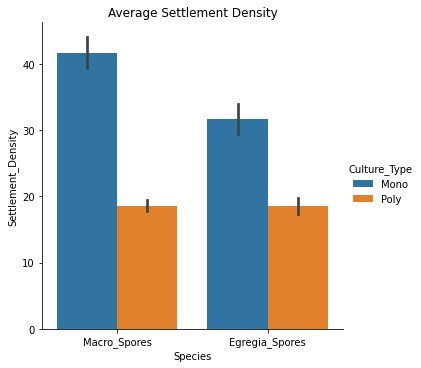

In [9]:
#Plot mean settlement density vs Species and culture type

sns.catplot(data=settlement_density_melt, kind="bar", x="Species", y="Settlement_Density", hue="Culture_Type",).set(title='Average Settlement Density');

In [10]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

/Users/jayceelanza/opt/miniconda3/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [41]:
#Test for Normality using subsets
from Final import shapiro_func 
norm_list = [M_Mono_SD, M_Poly_SD, E_Mono_SD, E_Poly_SD]
shapiro_func(norm_list, 'Settlement_Density')
#The data is not normal

[ShapiroResult(statistic=0.8972490429878235, pvalue=8.452759603372328e-10),
 ShapiroResult(statistic=0.9703751802444458, pvalue=0.0007373839034698904),
 ShapiroResult(statistic=0.9320408701896667, pvalue=1.8948259139506263e-07),
 ShapiroResult(statistic=0.9562023878097534, pvalue=2.3096692530089058e-05)]

In [12]:
#create histograms to visualize normality

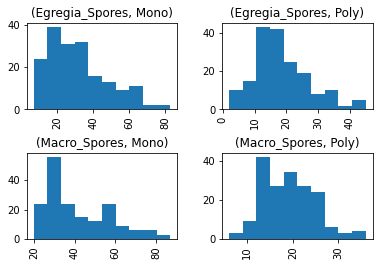

In [13]:
settlement_density_melt.hist(column='Settlement_Density', by=['Species','Culture_Type']);

In [43]:
#log transform data to increase normality
ln_M_Mono_SD=np.log(M_Poly_SD['Settlement_Density'])
ln_M_Poly_SD=np.log(M_Poly_SD['Settlement_Density'])
ln_E_Mono_SD=np.log(E_Mono_SD['Settlement_Density'])
ln_E_Poly_SD=np.log(E_Poly_SD['Settlement_Density'])

Text(0.5, 1.0, 'ln_E_Poly_SD')

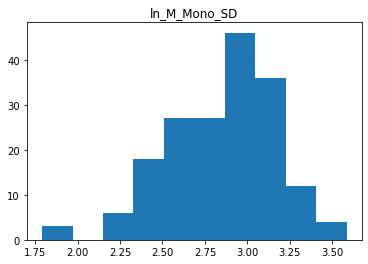

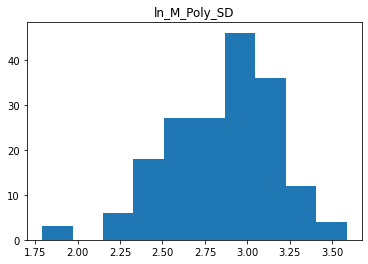

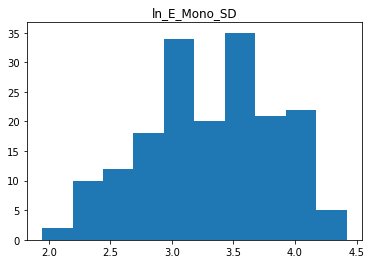

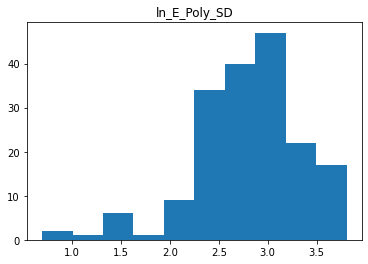

In [44]:
#plot log transformed data
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
n, bins, patches = ax1.hist(ln_M_Mono_SD)
ax1.set_title('ln_M_Mono_SD')
fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)
n, bins, patches = ax2.hist(ln_M_Poly_SD)
ax2.set_title('ln_M_Poly_SD')
fig3 = plt.figure()
ax3 = fig3.add_subplot(1,1,1)
n, bins, patches = ax3.hist(ln_E_Mono_SD)
ax3.set_title('ln_E_Mono_SD')
fig4 = plt.figure()
ax4 = fig4.add_subplot(1,1,1)
n, bins, patches = ax4.hist(ln_E_Poly_SD)
ax4.set_title('ln_E_Poly_SD')

In [48]:
#test normality of log transform
ln_norm1= syp.stats.shapiro(ln_M_Mono_SD)
ln_norm2= syp.stats.shapiro(ln_M_Poly_SD)
ln_norm3= syp.stats.shapiro(ln_E_Mono_SD)
ln_norm4 = syp.stats.shapiro(ln_E_Poly_SD)
print(ln_norm1, ln_norm2, ln_norm3, ln_norm4)

ShapiroResult(statistic=0.9670783281326294, pvalue=0.0003119317698292434) ShapiroResult(statistic=0.9670783281326294, pvalue=0.0003119317698292434) ShapiroResult(statistic=0.9846138954162598, pvalue=0.04641147330403328) ShapiroResult(statistic=0.9387887120246887, pvalue=6.492761599474761e-07)


In [17]:
#test data for homoscedasticity
eq_var_sp = pg.homoscedasticity(data= settlement_density_melt, dv= 'Settlement_Density', group = 'Species', method= 'levene',alpha=.05)
print(eq_var_sp)
eq_var_cul =pg.homoscedasticity(data= settlement_density_melt, dv= 'Settlement_Density', group = 'Culture_Type', method= 'levene',alpha=.05)
print(eq_var_cul)

               W      pval  equal_var
levene  2.291573  0.130521       True
                 W          pval  equal_var
levene  130.011212  8.745839e-28      False


The data is not normal or homoscedastic. The tests below may lack power becuase of this

In [36]:
#normality and homoscedasticity assumptions violated
pg.anova(data=settlement_density_melt, dv= 'Settlement_Density', between = ['Culture_Type', 'Species'], effsize= 'n2')

,Source,SS,DF,MS,F,p-unc,n2
0,Culture_Type,58627.710894,1,58627.710894,365.174110,4.992953e-66,0.322312
1,Species,4510.068436,1,4510.068436,28.091839,1.544736e-07,0.024795
2,Culture_Type * Species,4450.034916,1,4450.034916,27.717909,1.860423e-07,0.024465
3,Residual,114309.664804,712,160.547282,NaN,NaN,NaN


In [19]:
ttest1 = pg.pairwise_ttests(data=settlement_density_melt, dv= 'Settlement_Density', between= 'Culture_Type',correction= 'auto') 
print(ttest1)

       Contrast     A     B  Paired  Parametric          T    dof alternative  \
0  Culture_Type  Mono  Poly   False        True  18.427749  714.0   two-sided   

          p-unc       BF10    hedges  
0  2.495793e-62  4.514e+58  1.375907  


In [20]:
ttest2 = pg.pairwise_ttests(data=settlement_density_melt, dv= 'Settlement_Density', between= 'Species',correction= 'auto') 
print(ttest2)
#Settlement density varies significantly between both Species and Culture Type

  Contrast               A             B  Paired  Parametric         T    dof  \
0  Species  Egregia_Spores  Macro_Spores   False        True -4.260684  714.0   

  alternative     p-unc     BF10    hedges  
0   two-sided  0.000023  552.796 -0.318124  


In [21]:
ttest3 = pg.pairwise_ttests(data=settlement_density_melt, dv= 'Settlement_Density', between= ['Culture_Type', 'Species'],correction= 'auto') 
print(ttest3)



                 Contrast Culture_Type               A             B Paired  \
0            Culture_Type            -            Mono          Poly  False   
1                 Species            -  Egregia_Spores  Macro_Spores  False   
2  Culture_Type * Species         Mono  Egregia_Spores  Macro_Spores  False   
3  Culture_Type * Species         Poly  Egregia_Spores  Macro_Spores  False   

   Parametric          T    dof alternative         p-unc       BF10    hedges  
0        True  18.427749  714.0   two-sided  2.495793e-62  4.514e+58  1.375907  
1        True  -4.260684  714.0   two-sided  2.311191e-05    552.796 -0.318124  
2        True  -5.801414  356.0   two-sided  1.453617e-08   6.91e+05 -0.611936  
3        True  -0.042808  356.0   two-sided  9.658787e-01      0.117 -0.004515  


#### Summary

##### There were significant interactions between culture type and settlement density as well as between species and settlement density. In addition, the interaction between culture type and species was significant in Monocultures of Egregia and Macro spores. 

### The Effects of Light on the Timing of Egg Production

In [22]:
#Import egg_timing dataset
egg_timing = pd.read_excel(r'MS263_FinalProject_Data_EggTiming.xlsx')
print (egg_timing)

     Species Culture_Type Light_Level  Day  Av_Eggs/FOV  Ratio_Mature
0      Macro         Mono         Low    1          0.0           0.0
1      Macro         Mono         Low    2          0.0           0.0
2      Macro         Mono         Low    3          0.0           0.0
3      Macro         Mono         Low    4          0.0           0.0
4      Macro         Mono         Low    5          0.0           0.0
..       ...          ...         ...  ...          ...           ...
571  Egregia         Poly   Very High   32          NaN           NaN
572  Egregia         Poly   Very High   33          NaN           NaN
573  Egregia         Poly   Very High   34          NaN           NaN
574  Egregia         Poly   Very High   35          NaN           NaN
575  Egregia         Poly   Very High   36          NaN           NaN

[576 rows x 6 columns]


In [23]:
egg_timing_good = egg_timing.dropna() #Eliminate NA data

In [24]:
#subset data into Macrocystis Monoculture and Macrocystis Polyculture
egg_timing_macro = egg_timing_good[egg_timing_good["Species"].isin(['Macro'])] #subset so that the data only includes Macro
et_macro_mono = egg_timing_macro[egg_timing_macro["Culture_Type"].isin(['Mono'])] #subset so that the data only includes Monocultures of Macro\
et_macro_poly = egg_timing_macro[egg_timing_macro["Culture_Type"].isin(['Poly'])] #subset so that the data only includes Polycultures of Macro

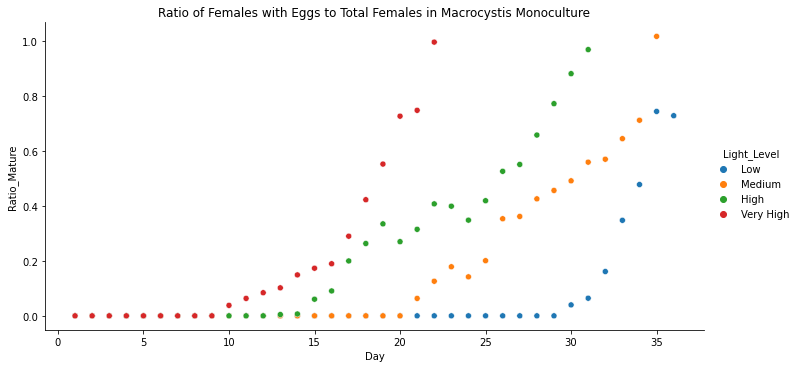

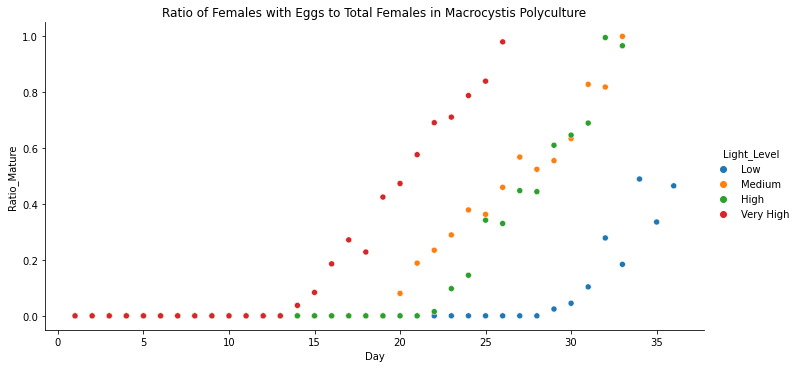

In [25]:
#Plot the proportion of females with eggs against day since spores were settled and light level for Macrocystis
sns.relplot(data=et_macro_mono, x= "Day", y="Ratio_Mature", hue="Light_Level", aspect = 2).set(title="Ratio of Females with Eggs to Total Females in Macrocystis Monoculture")
sns.relplot(data=et_macro_poly, x= "Day", y="Ratio_Mature", hue="Light_Level", aspect = 2).set(title="Ratio of Females with Eggs to Total Females in Macrocystis Polyculture")

In [26]:
egg_timing_egre = egg_timing_good[egg_timing_good["Species"].isin(['Egregia'])] #subset so that the data only includes Macro
et_egre_mono = egg_timing_egre[egg_timing_egre["Culture_Type"].isin(['Mono'])] #subset so that the data only includes Monocultures of Macro\
et_egre_poly = egg_timing_egre[egg_timing_egre["Culture_Type"].isin(['Poly'])] #subset so that the data only includes Polycultures of Macro

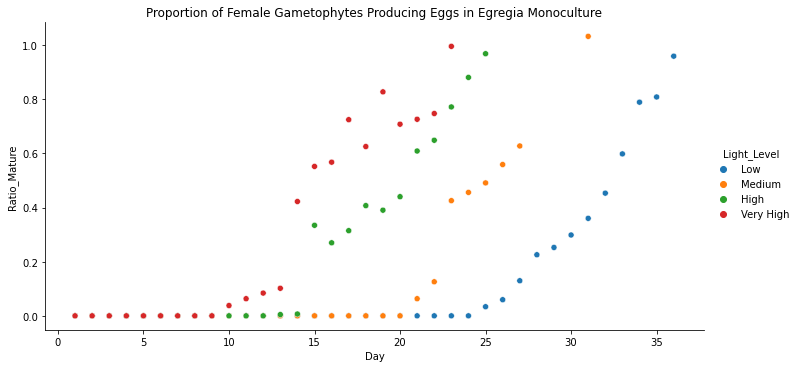

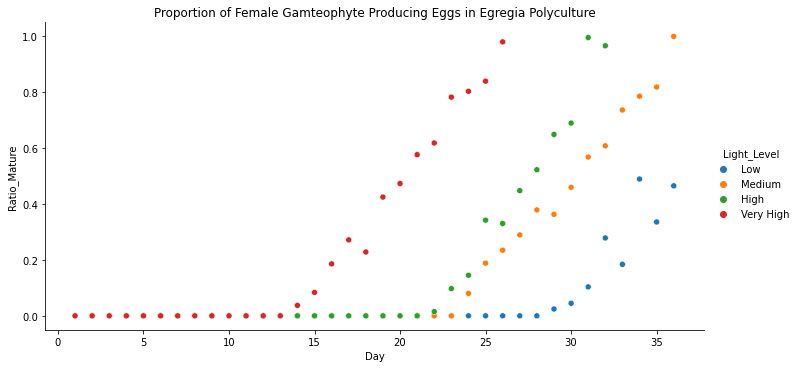

In [27]:
#Plot the proportion of females with eggs against day since spores were settled and light level for Egregia
sns.relplot(data=et_egre_mono, x= "Day", y="Ratio_Mature", hue="Light_Level", aspect = 2).set(title="Proportion of Female Gametophytes Producing Eggs in Egregia Monoculture")
sns.relplot(data=et_egre_poly, x= "Day", y="Ratio_Mature", hue="Light_Level", aspect = 2).set(title="Proportion of Female Gamteophyte Producing Eggs in Egregia Polyculture")


## The Effects of Light on Overall Sporophyte and Egg Production


In [28]:
eggs_and_sporos = egg_timing = pd.read_excel(r'MS263_FinalProject_SporophyteProduction.xlsx')
eggs_and_sporos

,Species,Culture_Type,Light_Level,SporophytesperFemale,Days_50_Eggs
0,Macro,Mono,Low,0.34,35.0
1,Macro,Mono,Medium,0.63,31.0
2,Macro,Mono,High,0.96,26.0
3,Macro,Mono,Very High,0.85,19.0
4,Macro,Poly,Low,0.35,NaN
...,...,...,...,...,...
59,Egregia,Mono,Very High,0.99,15.0
60,Egregia,Poly,Low,0.43,NaN
61,Egregia,Poly,Medium,0.70,34.0
62,Egregia,Poly,High,0.66,29.0


In [29]:
#eliminate NA values
ES_good = eggs_and_sporos.dropna() #Eliminate NA data

In [49]:
#subset data in order to test for normality

ES_M = ES_good[ES_good["Species"].isin(['Macro'])]

ES_M_Mono= ES_M[ES_M["Culture_Type"].isin(['Mono'])] 

df1 = ES_M_Mono[ES_M_Mono["Light_Level"].isin(['Low'])]
df2 = ES_M_Mono[ES_M_Mono["Light_Level"].isin(['Medium'])]
df3 = ES_M_Mono[ES_M_Mono["Light_Level"].isin(['High'])]
df4 = ES_M_Mono[ES_M_Mono["Light_Level"].isin(['Very High'])]

ES_M_Poly= ES_M[ES_M["Culture_Type"].isin(['Poly'])]

df5 = ES_M_Poly[ES_M_Poly["Light_Level"].isin(['Low'])]
df6 = ES_M_Poly[ES_M_Poly["Light_Level"].isin(['Medium'])]
df7 = ES_M_Poly[ES_M_Poly["Light_Level"].isin(['High'])]
df8 = ES_M_Poly[ES_M_Poly["Light_Level"].isin(['Very High'])]



ES_E = ES_good[ES_good["Species"].isin(['Macro'])]

ES_E_Mono= ES_E[ES_E["Culture_Type"].isin(['Mono'])] 

df9 = ES_E_Mono[ES_E_Mono["Light_Level"].isin(['Low'])]
df10 = ES_E_Mono[ES_E_Mono["Light_Level"].isin(['Medium'])]
df11 = ES_E_Mono[ES_E_Mono["Light_Level"].isin(['High'])]
df12 = ES_E_Mono[ES_E_Mono["Light_Level"].isin(['Very High'])]

ES_E_Poly= ES_E[ES_E["Culture_Type"].isin(['Poly'])]

df13 = ES_E_Poly[ES_E_Poly["Light_Level"].isin(['Low'])]
df14= ES_E_Poly[ES_E_Poly["Light_Level"].isin(['Medium'])]
df15 = ES_E_Poly[ES_E_Poly["Light_Level"].isin(['High'])]
df16 = ES_E_Poly[ES_E_Poly["Light_Level"].isin(['Very High'])]


X = list()
list_df = [df2,df3,df4,df6,df7,df8,df10,df11,df12,df14,df15,df16]

### Number of Days until 50% of Female Gametophytes Produced Eggs

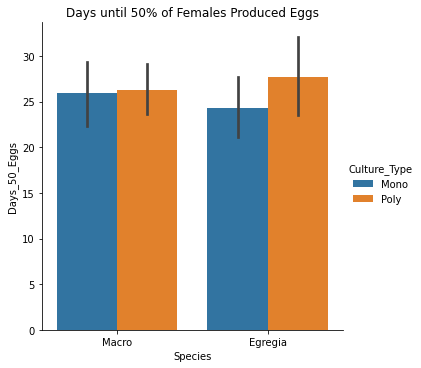

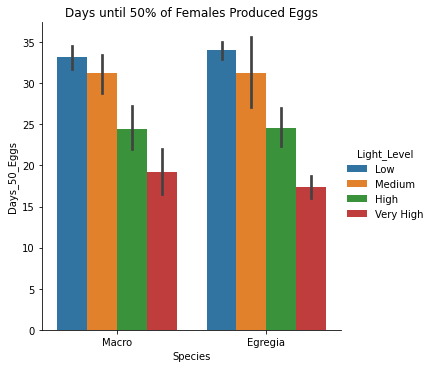

In [31]:
#Graph Data
sns.catplot(data=ES_good, kind="bar", x="Species", y="Days_50_Eggs", hue="Culture_Type",).set(title='Days until 50% of Females Produced Eggs');
sns.catplot(data=ES_good, kind="bar", x="Species", y="Days_50_Eggs", hue="Light_Level",).set(title='Days until 50% of Females Produced Eggs');


In [50]:
#Test for Normality
shapiro_func(list_df, 'Days_50_Eggs')
#The data looks relatively normal

[ShapiroResult(statistic=0.971327006816864, pvalue=0.849683403968811),
 ShapiroResult(statistic=0.9908954501152039, pvalue=0.9620108008384705),
 ShapiroResult(statistic=0.9392696619033813, pvalue=0.6498783826828003),
 ShapiroResult(statistic=0.896539568901062, pvalue=0.41407454013824463),
 ShapiroResult(statistic=0.8783183693885803, pvalue=0.33150339126586914),
 ShapiroResult(statistic=0.7526593804359436, pvalue=0.04089093580842018),
 ShapiroResult(statistic=0.971327006816864, pvalue=0.849683403968811),
 ShapiroResult(statistic=0.9908954501152039, pvalue=0.9620108008384705),
 ShapiroResult(statistic=0.9392696619033813, pvalue=0.6498783826828003),
 ShapiroResult(statistic=0.896539568901062, pvalue=0.41407454013824463),
 ShapiroResult(statistic=0.8783183693885803, pvalue=0.33150339126586914),
 ShapiroResult(statistic=0.7526593804359436, pvalue=0.04089093580842018)]

(array([1., 0., 0., 0., 0., 0., 1., 0., 0., 2.]),
 array([0.34 , 0.372, 0.404, 0.436, 0.468, 0.5  , 0.532, 0.564, 0.596,
        0.628, 0.66 ]),
 <BarContainer object of 10 artists>)

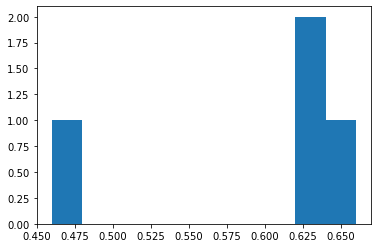

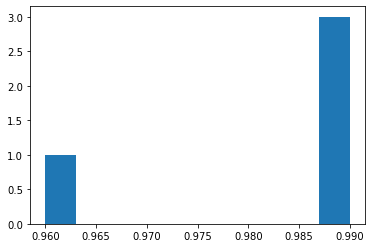

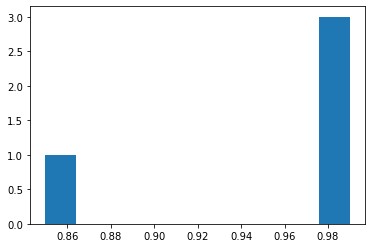

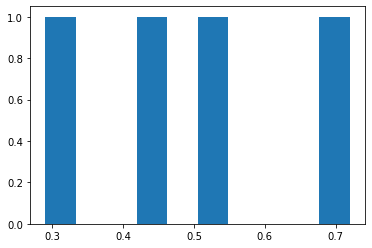

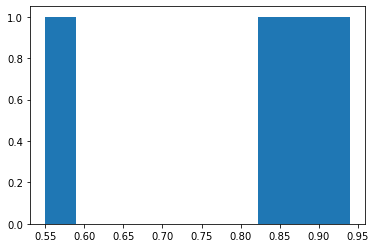

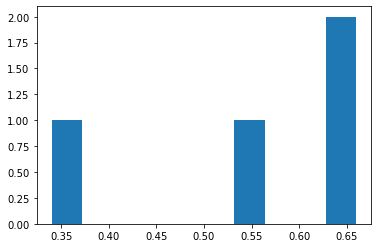

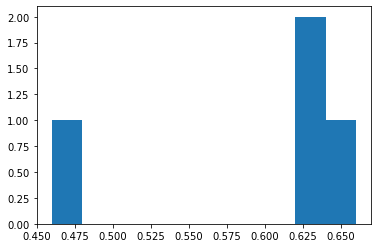

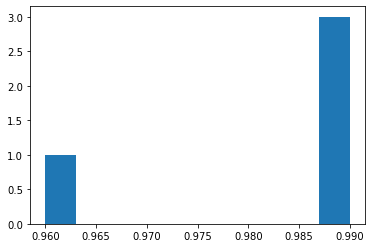

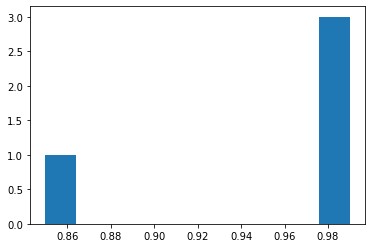

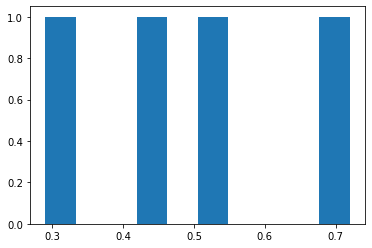

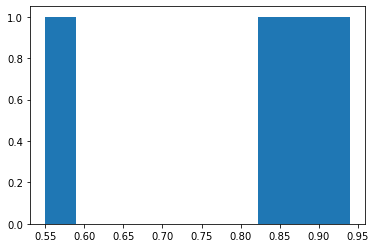

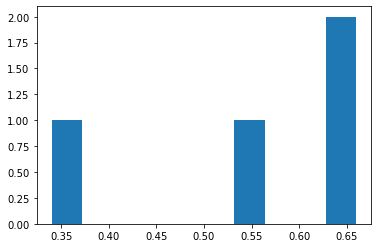

In [52]:
#test for normality with histograms
from Final import histograms
histograms(list_df, 'Days_50_Eggs')

##### This is a relatively small data set, therefore the tests of normality and homoscedasticity are limited in power. Ive decided to procede with the tests as this is my thesis data, and I will continue to build on this dataset
    

In [ ]:
eq_var_SP = pg.homoscedasticity(data= ES_good, dv= 'Days_50_Eggs', group = 'Species', method= 'levene',alpha=.05)
eq_var_CT = pg.homoscedasticity(data= ES_good, dv= 'Days_50_Eggs', group = 'Culture_Type', method= 'levene',alpha=.05)
eq_var_LL = pg.homoscedasticity(data= ES_good, dv= 'Days_50_Eggs', group = 'Light_Level', method= 'levene',alpha=.05)
print(eq_var_SP, eq_var_CT, eq_var_LL)

#variances are equal

In [53]:
#as variances are equal and data is relatively normal, a normal ANOVA can be used

Days_50_Eggs = ES_good['Days_50_Eggs']
species = ES_good['Species']
lightlevel = ES_good['Light_Level']
culture = ES_good['Culture_Type']


model = ols('Days_50_Eggs ~ C(species) + C(lightlevel) + C(culture)+ C(species):C(lightlevel)+ C(species):C(culture)+C(culture):C(lightlevel)', data=ES_good).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
anova_table

/Users/jayceelanza/opt/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
Intercept,2112.602083,1.0,197.757982,6.932239e-18
C(species),9.630208,1.0,0.901472,3.475736e-01
C(lightlevel),1027.951389,3.0,32.075072,3.795165e-11
C(culture),148.755208,1.0,13.924785,5.422346e-04
C(species):C(lightlevel),25.885417,3.0,0.807700,4.964020e-01
C(species):C(culture),44.083333,1.0,4.126585,4.828170e-02
C(culture):C(lightlevel),2.312500,3.0,0.072157,9.304949e-01
Residual,470.041667,44.0,NaN,NaN


In [54]:
#post hoc tukey test
import bioinfokit
from bioinfokit.analys import stat

res = stat()
res.tukey_hsd(df=ES_good, res_var= 'Days_50_Eggs', xfac_var='Light_Level', anova_model= 'Days_50_Eggs ~ C(Species) + C(Light_Level) + C(Culture_Type)+ C(Species):C(Light_Level)+ C(Species):C(Culture_Type)+C(Culture_Type):C(Light_Level)')
LL1= res.tukey_summary

res = stat()
res.tukey_hsd(df=ES_good, res_var= 'Days_50_Eggs', xfac_var='Culture_Type', anova_model= 'Days_50_Eggs ~ C(Species) + C(Light_Level) + C(Culture_Type)+ C(Species):C(Light_Level)+ C(Species):C(Culture_Type)+C(Culture_Type):C(Light_Level)')
CT1= res.tukey_summary

print(LL1, CT1)

   group1     group2     Diff      Lower      Upper    q-value   p-value
0     Low     Medium   2.3750  -1.404066   6.154066   2.373210  0.347612
1     Low       High   9.1875   5.408434  12.966566   9.180575  0.001000
2     Low  Very High  15.3125  11.533434  19.091566  15.300958  0.001000
3  Medium       High   6.8125   3.726906   9.898094   8.337285  0.001000
4  Medium  Very High  12.9375   9.851906  16.023094  15.833193  0.001000
5    High  Very High   6.1250   3.039406   9.210594   7.495908  0.001000   group1 group2     Diff     Lower     Upper   q-value   p-value
0   Mono   Poly  1.84375  0.065022  3.622478  2.954349  0.042522


/Users/jayceelanza/opt/miniconda3/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/Users/jayceelanza/opt/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/Users/jayceelanza/opt/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/Users/jayceelanza/opt/miniconda3/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWa

In [55]:
res = stat()
res.tukey_hsd(df=ES_good, res_var= 'Days_50_Eggs', xfac_var=['Species', 'Light_Level'], anova_model= 'Days_50_Eggs ~ C(Species) + C(Light_Level) + C(Culture_Type)+ C(Species):C(Light_Level)+ C(Species):C(Culture_Type)+C(Culture_Type):C(Light_Level)')
SPLL= res.tukey_summary

res = stat()
res.tukey_hsd(df=ES_good, res_var= 'Days_50_Eggs', xfac_var=['Species', 'Culture_Type'], anova_model= 'Days_50_Eggs ~ C(Species) + C(Light_Level) + C(Culture_Type)+ C(Species):C(Light_Level)+ C(Species):C(Culture_Type)+C(Culture_Type):C(Light_Level)')
SPCT= res.tukey_summary


print(SPLL, SPCT)

/Users/jayceelanza/opt/miniconda3/lib/python3.8/site-packages/bioinfokit/analys.py:368: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[(ele1, ele2)] = df[(df[xfac_var[0]] == ele1) &
/Users/jayceelanza/opt/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/Users/jayceelanza/opt/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/Users/jayceelanza/opt/miniconda3/lib/python3.8/site-packages/bioinfokit/analys.py:368: FutureWarnin

                group1                group2    Diff      Lower      Upper  \
0         (Macro, Low)       (Macro, Medium)   2.000  -4.366962   8.366962   
1         (Macro, Low)         (Macro, High)   8.875   2.508038  15.241962   
2         (Macro, Low)    (Macro, Very High)  14.000   7.633038  20.366962   
3         (Macro, Low)        (Egregia, Low)   0.750  -6.601935   8.101935   
4         (Macro, Low)     (Egregia, Medium)   2.000  -4.366962   8.366962   
5         (Macro, Low)       (Egregia, High)   8.750   2.383038  15.116962   
6         (Macro, Low)  (Egregia, Very High)  15.875   9.508038  22.241962   
7      (Macro, Medium)         (Macro, High)   6.875   1.676397  12.073603   
8      (Macro, Medium)    (Macro, Very High)  12.000   6.801397  17.198603   
9      (Macro, Medium)        (Egregia, Low)   2.750  -3.616962   9.116962   
10     (Macro, Medium)     (Egregia, Medium)   0.000  -5.198603   5.198603   
11     (Macro, Medium)       (Egregia, High)   6.750   1.551397 

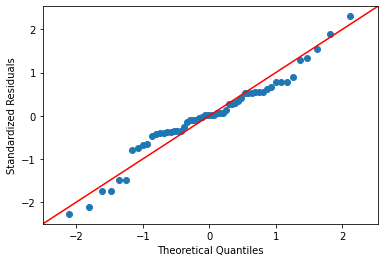

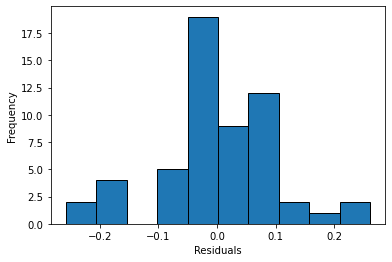

0.9627022743225098 0.08090098202228546


In [69]:
# test residuals
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from two-way ANOVA
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

# Shapiro-Wilk test
import scipy.stats as stats
w, pvalue = stats.shapiro(res.anova_model_out.resid)
print(w, pvalue)


#residuals are normal

#### Summary

##### Light Level had a strong affect on the timing of egg production. There were significant differences in eg gproduction between all light treatments except between Low and Medium. There was also a significant differences in the timing of egg production between culture type. The interaction between species and culture type was significant between Egregia monocultures and Egregia polycultures. The interaction between light level and species was significant for many of the interactions. 

##### There was no significant difference in the timing of egg production between species, and the interactions between culture type and light level and species and light level were not significant

#### Number of Sporophytes Produced per Female after 4 weeks

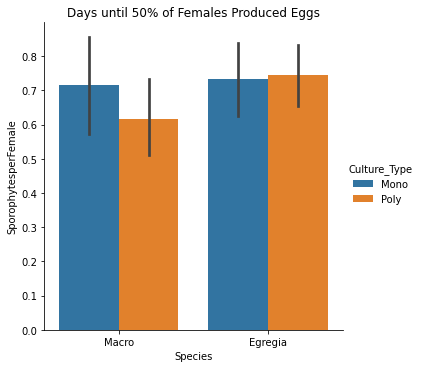

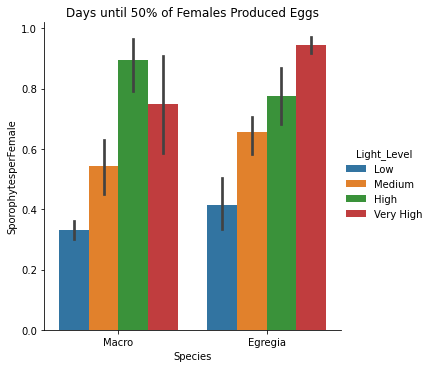

In [70]:
#Graph Data
sns.catplot(data=ES_good, kind="bar", x="Species", y="SporophytesperFemale", hue="Culture_Type",).set(title='Days until 50% of Females Produced Eggs');
sns.catplot(data=ES_good, kind="bar", x="Species", y="SporophytesperFemale", hue="Light_Level",).set(title='Days until 50% of Females Produced Eggs');

In [60]:
#test normality number of sporophytes
shapiro_func(list_df, 'SporophytesperFemale')      
#looks mostly normal

[ShapiroResult(statistic=0.758766770362854, pvalue=0.0464971624314785),
 ShapiroResult(statistic=0.6297762393951416, pvalue=0.001240724348463118),
 ShapiroResult(statistic=0.6297762393951416, pvalue=0.001240724348463118),
 ShapiroResult(statistic=0.9935473203659058, pvalue=0.9748672246932983),
 ShapiroResult(statistic=0.8159253001213074, pvalue=0.1339835226535797),
 ShapiroResult(statistic=0.8703508377075195, pvalue=0.29906025528907776),
 ShapiroResult(statistic=0.758766770362854, pvalue=0.0464971624314785),
 ShapiroResult(statistic=0.6297762393951416, pvalue=0.001240724348463118),
 ShapiroResult(statistic=0.6297762393951416, pvalue=0.001240724348463118),
 ShapiroResult(statistic=0.9935473203659058, pvalue=0.9748672246932983),
 ShapiroResult(statistic=0.8159253001213074, pvalue=0.1339835226535797),
 ShapiroResult(statistic=0.8703508377075195, pvalue=0.29906025528907776)]

(array([1., 0., 0., 0., 0., 0., 1., 0., 0., 2.]),
 array([0.34 , 0.372, 0.404, 0.436, 0.468, 0.5  , 0.532, 0.564, 0.596,
        0.628, 0.66 ]),
 <BarContainer object of 10 artists>)

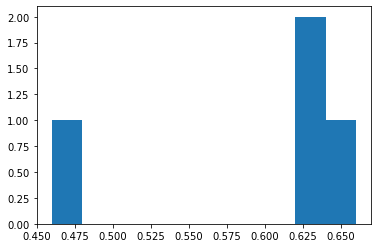

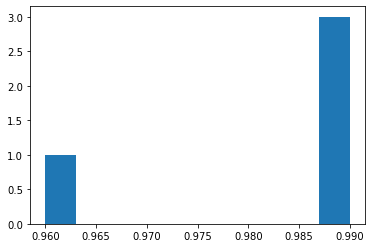

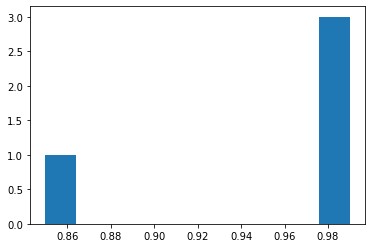

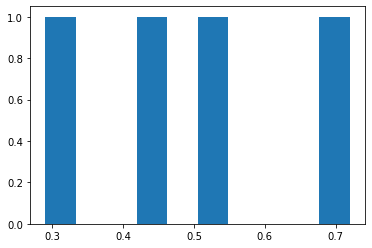

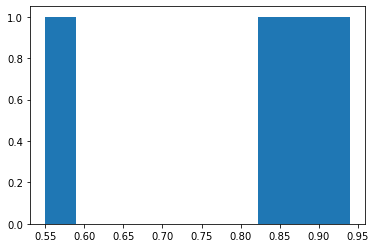

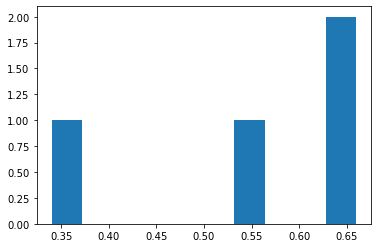

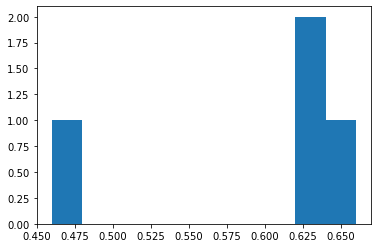

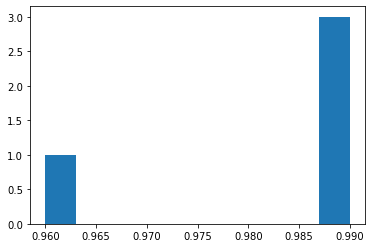

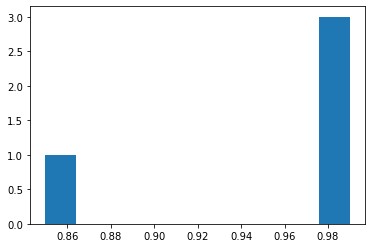

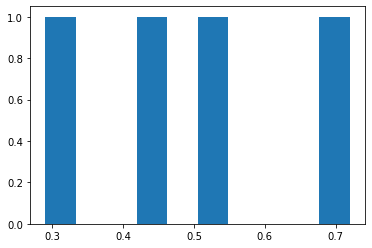

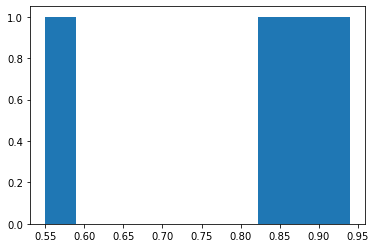

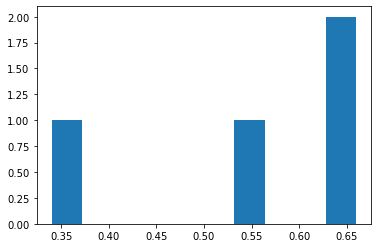

In [62]:
#hists for sporophytes/female
histograms(list_df, 'SporophytesperFemale')

##### As stated above, this is a relatively small data set, therefore the tests of normality and homoscedasticity are limited in power. Ive decided to procede with the tests as this is my thesis data, and I will continue to build on this dataset
    

In [63]:
eq_var_SP = pg.homoscedasticity(data= ES_good, dv= 'SporophytesperFemale', group = 'Species', method= 'levene',alpha=.05)
eq_var_CT = pg.homoscedasticity(data= ES_good, dv= 'SporophytesperFemale', group = 'Culture_Type', method= 'levene',alpha=.05)
eq_var_LL = pg.homoscedasticity(data= ES_good, dv= 'SporophytesperFemale', group = 'Light_Level', method= 'levene',alpha=.05)
print(eq_var_SP, eq_var_CT, eq_var_LL)


#equal variance assumption met

               W      pval  equal_var
levene  3.005994  0.088664       True                W     pval  equal_var
levene  2.375145  0.12912       True                W      pval  equal_var
levene  1.002306  0.399251       True


In [64]:
#run ANOVA
sporoperfem = ES_good['SporophytesperFemale']
species = ES_good['Species']
lightlevel = ES_good['Light_Level']
culture = ES_good['Culture_Type']


model = ols('sporoperfem ~ C(species) + C(lightlevel) + C(culture)+ C(species):C(lightlevel)+ C(species):C(culture)+C(culture):C(lightlevel)', data=ES_good).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
anova_table

/Users/jayceelanza/opt/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
Intercept,3.194803,1.0,248.478168,1.031324e-19
C(species),0.103602,1.0,8.057728,6.831378e-03
C(lightlevel),0.884985,3.0,22.943445,4.286895e-09
C(culture),0.018802,1.0,1.462346,2.330151e-01
C(species):C(lightlevel),0.222896,3.0,5.778629,2.018751e-03
C(species):C(culture),0.054002,1.0,4.200052,4.641352e-02
C(culture):C(lightlevel),0.056931,3.0,1.475957,2.396550e-01
Residual,0.565729,44.0,NaN,NaN


In [65]:
#run post hoc tukey tests on significant results

res.tukey_hsd(df=ES_good, res_var= 'SporophytesperFemale', xfac_var='Light_Level', anova_model='SporophytesperFemale ~ C(Species) + C(Light_Level) + C(Culture_Type)+ C(Species):C(Light_Level)+ C(Species):C(Culture_Type)+C(Culture_Type):C(Light_Level)')
LL= res.tukey_summary


res = stat()
res.tukey_hsd(df=ES_good, res_var= 'SporophytesperFemale', xfac_var='Species', anova_model='SporophytesperFemale ~ C(Species) + C(Light_Level) + C(Culture_Type)+ C(Species):C(Light_Level)+ C(Species):C(Culture_Type)+C(Culture_Type):C(Light_Level)')
SP= res.tukey_summary

print(LL, SP)

   group1     group2      Diff     Lower     Upper    q-value  p-value
0     Low     Medium  0.226250  0.095145  0.357355   6.516659    0.001
1     Low       High  0.461875  0.330770  0.592980  13.303346    0.001
2     Low  Very High  0.473750  0.342645  0.604855  13.645380    0.001
3  Medium       High  0.235625  0.128578  0.342672   8.311959    0.001
4  Medium  Very High  0.247500  0.140453  0.354547   8.730864    0.001
5    High  Very High  0.011875 -0.095172  0.118922   0.418905    0.900   group1   group2      Diff     Lower    Upper   q-value   p-value
0  Macro  Egregia  0.065714  0.004639  0.12679  3.066626  0.035574


/Users/jayceelanza/opt/miniconda3/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/Users/jayceelanza/opt/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/Users/jayceelanza/opt/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/Users/jayceelanza/opt/miniconda3/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWa

In [66]:
res = stat()
res.tukey_hsd(df=ES_good, res_var= 'SporophytesperFemale', xfac_var=['Species','Culture_Type'], anova_model='SporophytesperFemale ~ C(Species) + C(Light_Level) + C(Culture_Type)+ C(Species):C(Light_Level)+ C(Species):C(Culture_Type)+C(Culture_Type):C(Light_Level)')
res.tukey_summary

/Users/jayceelanza/opt/miniconda3/lib/python3.8/site-packages/bioinfokit/analys.py:368: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[(ele1, ele2)] = df[(df[xfac_var[0]] == ele1) &
/Users/jayceelanza/opt/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/Users/jayceelanza/opt/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Macro, Mono)","(Macro, Poly)",0.10125,-0.014374,0.216874,3.306768,0.104916
1,"(Macro, Mono)","(Egregia, Mono)",0.01750,-0.089547,0.124547,0.617334,0.900000
2,"(Macro, Mono)","(Egregia, Poly)",0.02875,-0.086874,0.144374,0.938959,0.900000
3,"(Macro, Poly)","(Egregia, Mono)",0.11875,0.003126,0.234374,3.878308,0.042133
4,"(Macro, Poly)","(Egregia, Poly)",0.13000,0.006393,0.253607,3.971513,0.035910
5,"(Egregia, Mono)","(Egregia, Poly)",0.01125,-0.104374,0.126874,0.367419,0.900000


In [67]:
res = stat()
res.tukey_hsd(df=ES_good, res_var= 'SporophytesperFemale', xfac_var=['Light_Level','Species'], anova_model='SporophytesperFemale ~ C(Species) + C(Light_Level) + C(Culture_Type)+ C(Species):C(Light_Level)+ C(Species):C(Culture_Type)+C(Culture_Type):C(Light_Level)')
res.tukey_summary

/Users/jayceelanza/opt/miniconda3/lib/python3.8/site-packages/bioinfokit/analys.py:368: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[(ele1, ele2)] = df[(df[xfac_var[0]] == ele1) &
/Users/jayceelanza/opt/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/Users/jayceelanza/opt/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Low, Macro)","(Low, Egregia)",0.08250,-0.172557,0.337557,1.455144,0.900000
1,"(Low, Macro)","(Medium, Macro)",0.21125,-0.009636,0.432136,4.302473,0.070153
2,"(Low, Macro)","(Medium, Egregia)",0.32375,0.102864,0.544636,6.593731,0.001000
3,"(Low, Macro)","(High, Macro)",0.56250,0.341614,0.783386,11.456289,0.001000
4,"(Low, Macro)","(High, Egregia)",0.44375,0.222864,0.664636,9.037739,0.001000
5,"(Low, Macro)","(Very High, Macro)",0.41750,0.196614,0.638386,8.503112,0.001000
6,"(Low, Macro)","(Very High, Egregia)",0.61250,0.391614,0.833386,12.474625,0.001000
7,"(Low, Egregia)","(Medium, Macro)",0.12875,-0.092136,0.349636,2.622217,0.576958
8,"(Low, Egregia)","(Medium, Egregia)",0.24125,0.020364,0.462136,4.913475,0.023532
9,"(Low, Egregia)","(High, Macro)",0.48000,0.259114,0.700886,9.776033,0.001000


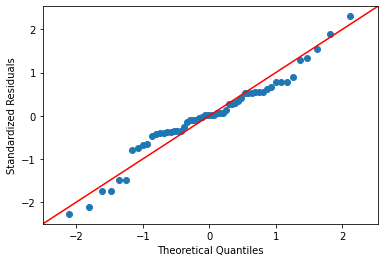

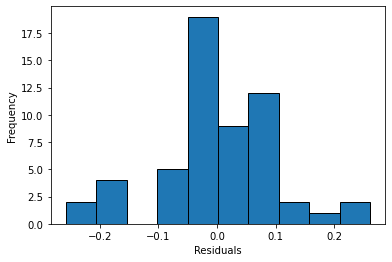

0.9627022743225098 0.08090098202228546


In [68]:
# test residuals
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from two-way ANOVA
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

# Shapiro-Wilk test
import scipy.stats as stats
w, pvalue = stats.shapiro(res.anova_model_out.resid)
print(w, pvalue)



#residuals are normal

#### Summary

##### There was a significant interaciton between light level and the number of sporophytes produced per female. The number of sporophytes produced was different between all light treatments except between high and very high. There was also a significant differences in the number of sporophytes produced per female between species. The interaction between species and culture type was significant between Macrocystis polyculture and Egregia monoculture, and between Macrocystis polyculture and Egregia polyculture. The interaction between species and light level was significant between many treatments.

##### There was no difference in the number of sporophytes produced per female between monocultures and polycultures. The interaction between culture type and light level was not significant

## Conclusions
 

#### Settlement Density

The settlement density in these experiments varied by both species and culture type. This is not ideal for this experiment as varying settlemnt density could potentially affect the later portions of this experiemnt, such as the timing of egg production and overall fertilization success. 

#### Timing of Egg Production

There was no significance in the timing of egg production between species, indicating that at ambient conditions, these species would produce their eggs at the same time. This indicates that they would likely compete with eachother. 

There was a significant difference in the number of days until 50% of females produced eggs between monocultures and polycultures. This is an indication that some sort of competition is occuring, causing one or both species in the polyculture to delay their egg production. 

Light level had a strong effect on the timing of egg production. The number of days until 50% of female gametophytes produced eggs varied between all light levels except for low and medium. This may be because the low and medium light treatments are too close together to elicit a significant difference. The outcome of sexual competition is dependent on which species produced their egg first, and this analysis shows that the timing of egg production is dependent on light level. This means that sexual competition in kelps could be impacted by changing the amount of light. 

There was no significant interaction between culture type and light level. This indicates that monocultures and polycultures were impacted in the same way by changing light levels. Additionally, the interactions between species and light level were not significant. As light level alone was significant, this indicates that both species were impacted by light in a similar way. 

The significant interaction between species and culture type between Egregia monocultures and Egregia polycultures may have been due to an error in data collection, or just not having enough data. 



#### Number of Sporophytes Produced per Female

There was no significant difference in the number of sporophytes produced in monocultures and polycultures. This suggests a competitive interaction as the number of spores settled did vary between monoculture and polyculture.

There was a significant difference in the number of sporophytes produced per female between species. This means that one species had more successful fertilization than the other. This may be due to competitive interaction. 

Light level significantly impacted the number of sporophytes produced per female. The number of sporophytes produced was different between all light treatments except between high and very high. At both high and very high light levels, the maximum number of sporophytes produced per female (1) was reached, therefore they were not different. At lower light levels, lower levels of fertilization success were acheived, which verifies results of previous studies.

The interaction between species and light level was significant between many treatments. This indicates that the fertilization success of each species was different between light levels. 

The interaction between culture type and light level was not significant, indicating that both polycultures and monocultures were impacted similarly by light levels. 

The interaction between species and culture type was significant between Macrocystis polyculture and Egregia monoculture, and between Macrocystis polyculture and Egregia polyculture. This is likely due to a small data set. 

# Future Work

Firstly, I hope to solve the settlement density issue. To do this I intend to modify the solution of spores that are added to the petri dish so that settlement density does not vary by species or culture type. I also need to add more data to each dataset, which will happen as the project progresses. I think that it would be interesting to look add more species to the project. In terms of analysis, I think that running an ANOVA that does not look at species as a variable may be helpful in determining how individual species were affected by culture type and light level. 

# References

Abbot, I. A., & Hollenberg, G. J., (1982)Marine Algae of California. Stanford University Press

Dayton, P.K. (1985) Ecology of kelp communities. Annual Review of Ecolology and Systematics, 16 215–45 

Christiansen, M. S. (2018). "Chemical Competition between Microscopic Stages of Macrocystis pyrifera and Five Native
Kelp Species: Does Giant Kelp Always Lose?" San Jose State University:Master's Theses. 4896. 

Dayton, P.K., Tegner, M.J., Edwards, P.B. & Riser, K.L. (1999). Temporal and spatial scales of kelp demography: The
    role of oceanographic climate. Ecological Monographs, 69(2), 219– 250.

Foster, M. S. & Schiel, D. R. (1985). The ecology of giant kelp forest in California: A community profile. U.S. Fish
    and Wildlife Service. 

Gerard, V.A. (1984). The light environment in a giant kelp forest: influence of Macrocystis pyrifera on spatial and
    temporal variability. Marine Biology, 84, 189–195. 

Graham, M. (2004). Effects of Local Deforestation on the Diversity and Structure of Southern California Giant Kelp
    Forest Food Webs. Ecosystems 7, 341–357. 

Graham, M.H. (1996). Effect of high irradiance on recruitment of the giant kelp Macrocystis (Phaeophyta) in shallow
    water. Journal of Phycology, 32: 903-906. 

Graham, M. H., Vásquez, J. a., & Buschmann, A. H. (2007). Global ecology of the giant kelp. Oceanography and Marine
    Biology, 45, 39–88.

Hamilton, J. &  Konar, B. (2007). Implications of substrate complexity and kelp variability for south-central
    Alaskan nearshore fish communities. Fisheries Bulletin, 105:189-196.

Howard, A. C. (2014).  "Effects of Temperature on Sexual Competition in Kelps: Implications for Range Shifts in
    Foundation Species". San Jose State University: Master's Theses, 4419. 

Lind, A. C., & Konar, B. (2017). Effects of abiotic stressors on kelp early life-history stages. ALGAE, 32(3), 223
    233.

Mann, K. H., (1973) Seaweeds: their productivity and strategy for growth. Science, 182 975–81 

Reed D. C. & Foster M. S (1984). The effects of canopy shading on algal recruitment and growth in a giant kelp
    forest. Ecology 65: 937-948

Reed, D. C. (1990). The Effects of Variable Settlement and Early Competition onPatterns of Kelp Recruitment.
    Ecology, 71(2), 776–787.

Reed, D.C., Neushul, M. & Ebeling, A.W. (1991). Role of settlement density on gametophyte growth and reproduction in
    the kelps Pterygophora californica and Macrocystis pyrifera (Phaeophyceae). Journal of Phycology, 27: 361-366.

Smale, D. A., Burrows, M. T, Moore, P., O'Connor, N. & Hawkins, S. J. (2013). Threats and knowledge gaps for
    ecosystem services provided by kelp forests: a northeast Atlantic perspective. Ecology and Evolution, 3 (11),
    pp. 4016-4038

Torres-Moye, G. (2013). Benthic community structure in kelp forests from the SouthernCalifornia Bight. Ciencias 
    Marinas, 39, 239–252. 

Traiger, S. & Konar, B. (2017). Supply and survival: Glacial melt imposes limitations at the kelp microscopic life
    stage. Botanica Marina, 60. 

Veenhof, R. Champion, C., Wernberg, T. & Minne, A. Kelp gametophytes in changing oceans. Oceanography and Marine
    Biology Annual Review, 60 (in press).

West, J. A., & McBride, D. L. (1999). Long-term and diurnal carpospore discharge patterns in the Ceramiaceae 
    Rhodomelaceae and Delesseriaceae (Rhodophyta). Sixteenth International Seaweed Symposium, 101-113. 

Zacher, K., Bernard, M., Daniel Moreno, A., & Bartsch, I. (2019). Temperature mediates the outcome of species 
    interactions in early life-history stages of two sympatric kelp species. Marine Biology, 166(12), 161. 

